In [103]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import pickle
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_auc_score,roc_curve,mean_squared_error,precision_score,recall_score
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
# Loading data
train = pd.read_csv('last_train.csv')
test = pd.read_csv('last_test.csv')
print(train.shape, test.shape)



(6600, 10) (3400, 10)


In [104]:
X_train = train.drop(['activity','activityIndex'], axis=1)
y_train = train.activityIndex

X_test = test.drop(['activity','activityIndex'], axis=1)
y_test = test.activityIndex

print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

labels=[1,2,3,4]

X_train and y_train : ((6600, 8),(6600,))
X_test  and y_test  : ((3400, 8),(3400,))


In [105]:
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):

  #creating a set of all the unique classes using the actual class list
  unique_class = set(actual_class)
  roc_auc_dict = {}
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_actual_class = [0 if x in other_class else 1 for x in actual_class]
    new_pred_class = [0 if x in other_class else 1 for x in pred_class]

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
    roc_auc_dict[per_class] = roc_auc
    
  return roc_auc_dict

# assuming your already have a list of actual_class and predicted_class from the logistic regression classifier

In [106]:
def perform_model(model, X_train, y_train, X_test, y_test, class_labels,name, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    results = dict()
    model.fit(X_train.values, y_train.values)

    # predict test data
    print('Predicting test data')

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    results['predicted'] = y_pred
    results['proba'] = y_proba
    

    f_measure = f1_score(y_test, y_pred, average='weighted')
    results['f_measure'] = f_measure
    print('==> F1 Score:- {}\n'.format(f_measure))

    accuracy = accuracy_score(y_test, y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('==> Accuracy:- {}\n'.format(accuracy))

    print("------------------- Multi Class ROC Curves and ROC Areas -------------------")
    roc_auc_scores = roc_auc_score_multiclass(y_test, y_pred)
    results['roc_auc_scores'] = roc_auc_scores
    print('==> AUC Score:- {}\n'.format(roc_auc_scores))  
    # compute ROC curves for each class

    fpr = {}
    tpr = {}
    thresholds = {}
    for i in range(4):
        fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, y_proba[:, i], pos_label=i+1)
    # plot the ROC curves
    plt.figure()
    for i in range(4):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (ROC Area = {1:0.2f})'
                ''.format(i+1, roc_auc_scores[i+1]))
    plt.plot([0, 1], [0, 1],[0,1],'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name+' Multi-class ROC curves')
    plt.legend(loc="lower right")
    plt.savefig("roc_curvers_images/"+name)


    rms = mean_squared_error(y_test, y_pred, squared=False)
    results['rms'] = rms
    print('==> Root Mean Squared Error:- {}\n'.format(rms))

    rec = recall_score(y_test, y_pred, average='weighted')
    results['rec'] = rec
    print('==> Recall Score:- {}\n'.format(rec))

    prc_scr = precision_score(y_test, y_pred, average='weighted')
    results['prc_scr'] = prc_scr
    print('==> Precision Score:- {}\n'.format(prc_scr))

    # add the trained  model to the results
    results['model'] = model
    
    return results
    





KNN

Predicting test data
==> F1 Score:- 0.7785599818365379

==> Accuracy:- 0.778235294117647

------------------- Multi Class ROC Curves and ROC Areas -------------------
==> AUC Score:- {1: 0.758235294117647, 2: 0.8962745098039216, 3: 0.7994117647058823, 4: 0.9547058823529412}

==> Root Mean Squared Error:- 0.7420163308810107

==> Recall Score:- 0.778235294117647

==> Precision Score:- 0.779885506761552



/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


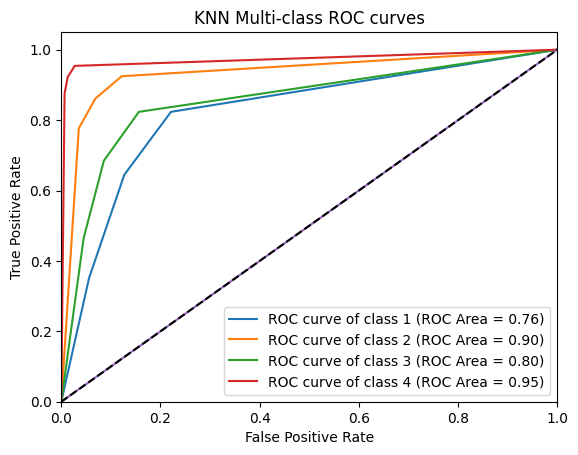

In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn_results = perform_model(knn_classifier, X_train, y_train, X_test, y_test, class_labels=labels, name='KNN')
# observe the attributes of the model 
filename = 'models/knn.sav'
pickle.dump(knn_results['model'], open(filename, 'wb'))





NAIVE BAYES

Predicting test data


/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


==> F1 Score:- 0.7742569043379667

==> Accuracy:- 0.7738235294117647

------------------- Multi Class ROC Curves and ROC Areas -------------------
==> AUC Score:- {1: 0.7249019607843138, 2: 0.88, 3: 0.8296078431372549, 4: 0.9623529411764706}

==> Root Mean Squared Error:- 0.7592566023652966

==> Recall Score:- 0.7738235294117647

==> Precision Score:- 0.7765707775435692



/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


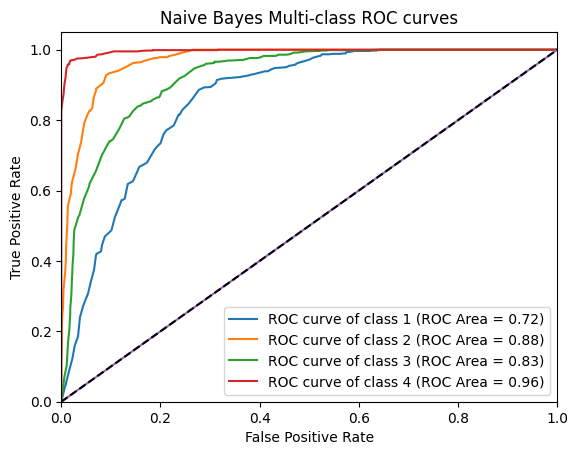

In [108]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_results = perform_model(nb_classifier, X_train, y_train, X_test, y_test, class_labels=labels, name='Naive Bayes')
# observe the attributes of the model 
filename = 'models/nb.sav'
pickle.dump(nb_results['model'], open(filename, 'wb'))

RANDOM FOREST

Predicting test data
==> F1 Score:- 0.83705355639578

==> Accuracy:- 0.8355882352941176

------------------- Multi Class ROC Curves and ROC Areas -------------------
==> AUC Score:- {1: 0.8223529411764705, 2: 0.9129411764705881, 3: 0.8635294117647059, 4: 0.9627450980392157}



/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


==> Root Mean Squared Error:- 0.6421471335889234

==> Recall Score:- 0.8355882352941176

==> Precision Score:- 0.8391858410116391



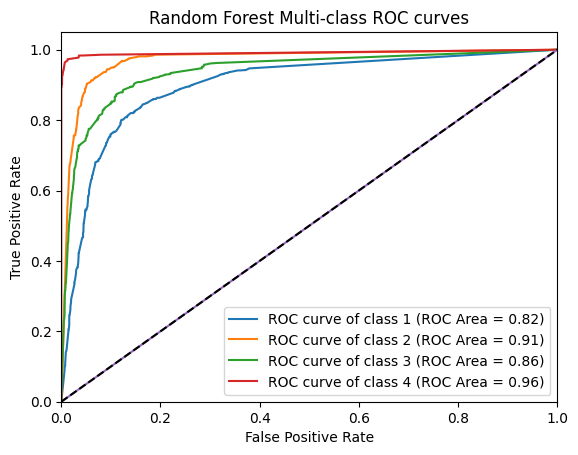

In [109]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_results = perform_model(rf_classifier, X_train, y_train, X_test, y_test, class_labels=labels , name='Random Forest')
# observe the attributes of the model 
filename = 'models/rf.sav'
pickle.dump(rf_results['model'], open(filename, 'wb'))

C4.5

Predicting test data
==> F1 Score:- 0.7577873917803262

==> Accuracy:- 0.7711764705882352

------------------- Multi Class ROC Curves and ROC Areas -------------------
==> AUC Score:- {1: 0.6750980392156863, 2: 0.9180392156862746, 3: 0.8286274509803921, 4: 0.9680392156862745}



/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


==> Root Mean Squared Error:- 0.7563457037158416

==> Recall Score:- 0.7711764705882352

==> Precision Score:- 0.7654379886278679



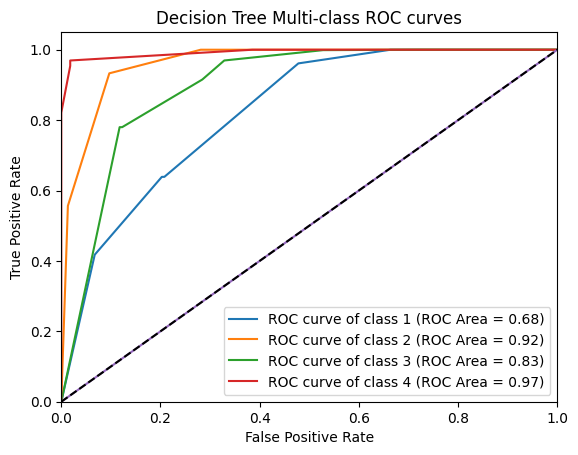

In [110]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth=3, random_state = 0)
dt_results = perform_model(dt_classifier, X_train, y_train, X_test, y_test, class_labels=labels , name='Decision Tree')
# observe the attributes of the model 
filename = 'models/c4.5.sav'
pickle.dump(dt_results['model'], open(filename, 'wb'))

SVM

Predicting test data
==> F1 Score:- 0.8735400651860223

==> Accuracy:- 0.8729411764705882

------------------- Multi Class ROC Curves and ROC Areas -------------------
==> AUC Score:- {1: 0.851764705882353, 2: 0.9323529411764704, 3: 0.9025490196078432, 4: 0.9745098039215686}



/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


==> Root Mean Squared Error:- 0.5643840994967043

==> Recall Score:- 0.8729411764705882

==> Precision Score:- 0.8745882438308039



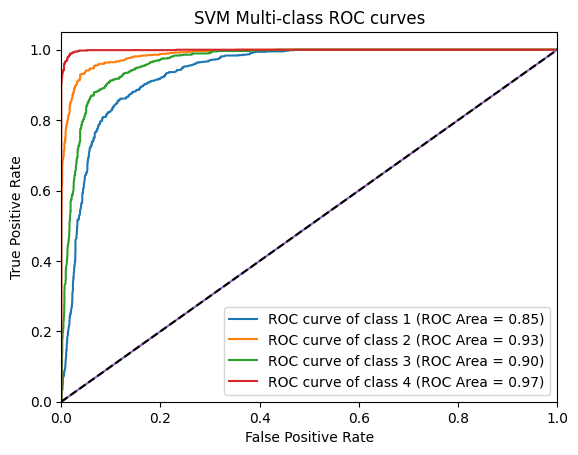

In [111]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear', random_state = 0,probability = True)
svm_results = perform_model(svm_classifier, X_train, y_train, X_test, y_test, class_labels=labels , name='SVM')
# observe the attributes of the model 
filename = 'models/svm.sav'
pickle.dump(svm_results['model'], open(filename, 'wb'))

MLP

Iteration 1, loss = 4.48837436
Iteration 2, loss = 0.75605860
Iteration 3, loss = 0.69338035
Iteration 4, loss = 0.67494279
Iteration 5, loss = 0.64951343
Iteration 6, loss = 0.66108466
Iteration 7, loss = 0.62570285
Iteration 8, loss = 0.63304692
Iteration 9, loss = 0.66945058
Iteration 10, loss = 0.62316048
Iteration 11, loss = 0.59552473
Iteration 12, loss = 0.62594078
Iteration 13, loss = 0.60748326
Iteration 14, loss = 0.61898158
Iteration 15, loss = 0.55828308
Iteration 16, loss = 0.61398459
Iteration 17, loss = 0.56512514
Iteration 18, loss = 0.60638931
Iteration 19, loss = 0.55127747
Iteration 20, loss = 0.58571855
Iteration 21, loss = 0.55951152
Iteration 22, loss = 0.57098216
Iteration 23, loss = 0.57197754
Iteration 24, loss = 0.53750368
Iteration 25, loss = 0.54589356
Iteration 26, loss = 0.55582431
Iteration 27, loss = 0.52649259
Iteration 28, loss = 0.51213962
Iteration 29, loss = 0.55365223
Iteration 30, loss = 0.50062870
Iteration 31, loss = 0.50704153
Iteration 32, los

/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


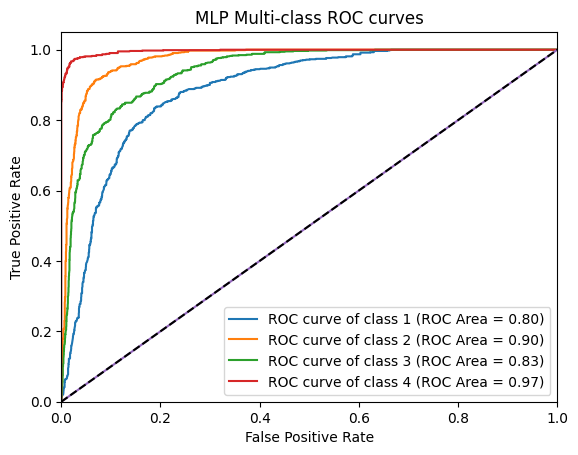

In [112]:
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
mlp_results = perform_model(mlp_classifier, X_train, y_train, X_test, y_test, class_labels=labels , name='MLP')
# observe the attributes of the model 
filename = 'models/mlp.sav'
pickle.dump(mlp_results['model'], open(filename, 'wb'))

LOGISTIC REGRESSION

Predicting test data
==> F1 Score:- 0.802802682304719

==> Accuracy:- 0.8017647058823529

------------------- Multi Class ROC Curves and ROC Areas -------------------
==> AUC Score:- {1: 0.7796078431372548, 2: 0.8972549019607843, 3: 0.8374509803921568, 4: 0.9570588235294117}

==> Root Mean Squared Error:- 0.7110472806319688

==> Recall Score:- 0.8017647058823529

==> Precision Score:- 0.8041474047972919



/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


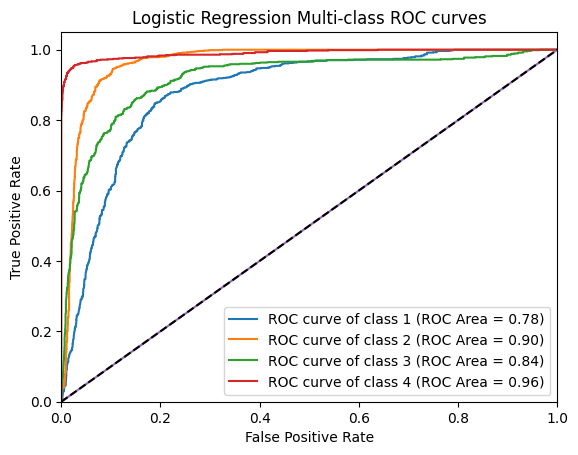

In [113]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 0)
lr_results = perform_model(lr_classifier, X_train, y_train, X_test, y_test, class_labels=labels , name='Logistic Regression')
# observe the attributes of the model 
filename = 'models/lr.sav'
pickle.dump(lr_results['model'], open(filename, 'wb'))

In [114]:
# ***************************** Print Accuracy and Error ******************************

print('\n                     Accuracy     Error       F1 Score         RMS         Precision       Recall    |       AUC 1 (Stair Up)    AUC 2 (Running)    AUC 3 (Walking)   AUC 4 (Sitting)')
print('                     ----------   --------     --------       -----        ---------       ------    |         -----------         -----------        -----------        ----------- ')
print('KNN                  : {:.04}%       {:.04}%       {:.04}%       {:.04}%       {:.04}%          {:.04}%                {:.04}%            {:.04}%              {:.04}%              {:.04}%'.format(knn_results['accuracy'] * 100,\
                                                  100-(knn_results['accuracy'] * 100),
                                                  knn_results['f_measure'] * 100,\
                                                    knn_results['rms'] * 100,\
                                                    knn_results['prc_scr'] * 100,\
                                                        knn_results['rec'] * 100,\
                                                          knn_results['roc_auc_scores'][1] * 100,\
                                                            knn_results['roc_auc_scores'][2] * 100,\
                                                              knn_results['roc_auc_scores'][3] * 100,\
                                                                knn_results['roc_auc_scores'][4] * 100)
                                                                  )
                                                         
print('Naive Bayes          : {:.04}%       {:.04}%       {:.04}%       {:.04}%       {:.04}%          {:.04}%                {:.04}%             {:.04}%             {:.04}%              {:.04}%'.format(nb_results['accuracy'] * 100,\
                                                  100-(nb_results['accuracy'] * 100),
                                                  nb_results['f_measure'] * 100,\
                                                  nb_results['rms'] * 100,\
                                                    nb_results['prc_scr'] * 100,\
                                                        nb_results['rec'] * 100,\
                                                          nb_results['roc_auc_scores'][1] * 100,\
                                                            nb_results['roc_auc_scores'][2] * 100,\
                                                              nb_results['roc_auc_scores'][3] * 100,\
                                                                nb_results['roc_auc_scores'][4] * 100)
                                                                  )                                                            
                                                        
print('Random Forest        : {:.04}%       {:.04}%       {:.04}%        {:.04}%       {:.04}%          {:.04}%                {:.04}%            {:.04}%             {:.04}%              {:.04}%'.format(rf_results['accuracy'] * 100,\
                                                  100-(rf_results['accuracy'] * 100),
                                                  rf_results['f_measure'] * 100,\
                                                    rf_results['rms'] * 100,\
                                                    rf_results['prc_scr'] * 100,\
                                                        rf_results['rec'] * 100,\
                                                          rf_results['roc_auc_scores'][1] * 100,\
                                                            rf_results['roc_auc_scores'][2] * 100,\
                                                              rf_results['roc_auc_scores'][3] * 100,\
                                                                rf_results['roc_auc_scores'][4] * 100)
                                                                  )

                                                         
print('C4.5                 : {:.04}%       {:.04}%       {:.04}%       {:.04}%       {:.04}%          {:.04}%                {:.04}%             {:.04}%             {:.04}%              {:.04}%'.format(dt_results['accuracy'] * 100,\
                                                  100-(dt_results['accuracy'] * 100),
                                                  dt_results['f_measure'] * 100,\
                                                    dt_results['rms'] * 100,\
                                                    dt_results['prc_scr'] * 100,\
                                                        dt_results['rec'] * 100,\
                                                          dt_results['roc_auc_scores'][1] * 100,\
                                                            dt_results['roc_auc_scores'][2] * 100,\
                                                              dt_results['roc_auc_scores'][3] * 100,\
                                                                dt_results['roc_auc_scores'][4] * 100)
                                                                  )    
                                                         
print('SVM                  : {:.04}%       {:.04}%       {:.04}%       {:.04}%       {:.04}%          {:.04}%                {:.04}%            {:.04}%             {:.04}%              {:.04}%'.format(svm_results['accuracy'] * 100,\
                                                  100-(svm_results['accuracy'] * 100),
                                                  svm_results['f_measure'] * 100,\
                                                    svm_results['rms'] * 100,\
                                                    svm_results['prc_scr'] * 100,\
                                                        svm_results['rec'] * 100,\
                                                          svm_results['roc_auc_scores'][1] * 100,\
                                                            svm_results['roc_auc_scores'][2] * 100,\
                                                              svm_results['roc_auc_scores'][3] * 100,\
                                                                svm_results['roc_auc_scores'][4] * 100)
                                                                  ) 
                                                         
print('MLP                  : {:.04}%       {:.04}%       {:.04}%       {:.04}%       {:.04}%          {:.04}%                {:.04}%            {:.04}%             {:.04}%              {:.04}%'.format(mlp_results['accuracy'] * 100,\
                                                  100-(mlp_results['accuracy'] * 100),
                                                  mlp_results['f_measure'] * 100,\
                                                    mlp_results['rms'] * 100,\
                                                    mlp_results['prc_scr'] * 100,\
                                                        mlp_results['rec'] * 100,\
                                                          mlp_results['roc_auc_scores'][1] * 100,\
                                                            mlp_results['roc_auc_scores'][2] * 100,\
                                                              mlp_results['roc_auc_scores'][3] * 100,\
                                                                mlp_results['roc_auc_scores'][4] * 100)
                                                                  ) 
                                                        
print('Logistic Regression  : {:.04}%       {:.04}%       {:.04}%        {:.04}%       {:.04}%          {:.04}%                 {:.04}%            {:.04}%             {:.04}%              {:.04}%'.format(lr_results['accuracy'] * 100,\
                                                  100-(lr_results['accuracy'] * 100),
                                                  lr_results['f_measure'] * 100,\
                                                    lr_results['rms'] * 100,\
                                                    lr_results['prc_scr'] * 100,\
                                                        lr_results['rec'] * 100,\
                                                          lr_results['roc_auc_scores'][1] * 100,\
                                                            lr_results['roc_auc_scores'][2] * 100,\
                                                              lr_results['roc_auc_scores'][3] * 100,\
                                                                lr_results['roc_auc_scores'][4] * 100)
                                                                  )                                                                   


                     Accuracy     Error       F1 Score         RMS         Precision       Recall    |       AUC 1 (Stair Up)    AUC 2 (Running)    AUC 3 (Walking)   AUC 4 (Sitting)
                     ----------   --------     --------       -----        ---------       ------    |         -----------         -----------        -----------        ----------- 
KNN                  : 77.82%       22.18%       77.86%       74.2%       77.99%          77.82%                75.82%            89.63%              79.94%              95.47%
Naive Bayes          : 77.38%       22.62%       77.43%       75.93%       77.66%          77.38%                72.49%             88.0%             82.96%              96.24%
Random Forest        : 83.56%       16.44%       83.71%        64.21%       83.92%          83.56%                82.24%            91.29%             86.35%              96.27%
C4.5                 : 77.12%       22.88%       75.78%       75.63%       76.54%          77.12%      

PREDITC MOVEMENT USING HEALTH DATAS

In [129]:
def bmi_value_cal(bmi_valu):
    bmi_index = 0
    if(bmi_valu<16):
        bmi_index = 0
        print("Vücut Tipi / Seviyesi: Çok Zayıf / 0")
    elif(16<bmi_valu<=18.5):
        bmi_index = 1
        print("Vücut Tipi / Seviyesi: Zayıf / 1")
    elif(18.5<bmi_valu<=25):
        bmi_index = 2
        print("Vücut Tipi / Seviyesi: Normal / 2")
    elif(25<bmi_valu<=30):
        bmi_index = 3
        print("Vücut Tipi / Seviyesi: Kilolu / 3")
    elif(30<bmi_valu<=35):
        bmi_index = 4
        print("Vücut Tipi / Seviyesi: Obezite Başlangıcı / 4")
    else:
        bmi_index = 5
        print("Vücut Tipi / Seviyesi: Obez / 5")

    return bmi_index

In [130]:
def news_input():
    height_input = int(input("Boy: "))
    weight_input = int(input("Kilo: "))
    age_input = int(input("Yaş: "))
    gender_input = input("Cinsiyet: ")
    if gender_input.startswith(('e','E')):
        gender_input=1
    elif gender_input.startswith(('k','K')):
        gender_input=0
    heart_rate_risk_input = input("Kalp Hastalığınız Var mı?: ")
    if heart_rate_risk_input.startswith(('e','E','v','V')):
        heart_rate_risk_input=1
    elif heart_rate_risk_input.startswith(('h','H','y','Y')):
        heart_rate_risk_input=0
    heart_rate_input = int(input("Kalp Atış Hızı: "))
    bmi = int(weight_input/((height_input/100)**2))
    bmiIndex = bmi_value_cal(bmi)
    input_arr = np.array([[height_input,weight_input,age_input,gender_input,bmi,bmiIndex,heart_rate_risk_input,heart_rate_input]])
    return input_arr

In [131]:
def new_outputs(pred_model,newInput):
    print("Boy:",newInput[0][0])
    print("Kilo:",newInput[0][1])
    print("Yaş:",newInput[0][2])
    if newInput[0][3] == 1:
        print("Cinsiyet: Erkek")
    else:
        print("Cinsiyet: Kız")
    print("Vücut Kitle İndexi:",newInput[0][4])
    bmi_value_cal(newInput[0][4])
    if newInput[0][6] == 1:
        print("Kalp Rahatsızlığı: Var")
    else:
        print("Kalp Rahatsızlığı: Yok")
    print("Kalp Atış Hızı:",newInput[0][7])
    

In [132]:
loaded_model = pickle.load(open('models/svm.sav', 'rb'))
result = loaded_model.score(X_test.values, y_test.values)
print(result)

0.8729411764705882


In [133]:
new_input = news_input()

# get prediction for new input

new_output = loaded_model.predict(new_input)
# summarize input and output
if new_output == 1:
    new_outputs(new_output,new_input)
    print("Şu anda Merdiven Çıkıyorsunuz!")
elif new_output == 2:
    new_outputs(new_output,new_input)
    print("Şu anda Koşuyorsunuz!")
elif new_output == 3:
    new_outputs(new_output,new_input)
    print("Şu anda Yürüyorsunuz!")
elif new_output == 4:
    new_outputs(new_output,new_input)
    print("Şu anda Oturuyorsunuz!")

Vücut Tipi / Seviyesi: Normal / 2
Boy: 174
Kilo: 72
Yaş: 22
Cinsiyet: Erkek
Vücut Kitle İndexi: 23
Vücut Tipi / Seviyesi: Normal / 2
Kalp Rahatsızlığı: Yok
Kalp Atış Hızı: 120
Şu anda Merdiven Çıkıyorsunuz!
